In [6]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("/Users/manishkhadka/Python-Codes/Mini Projects/WineQuality/winequality-red.csv",sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.isnull().any()

In [ ]:
data.info()

In [ ]:
n_wines=data.shape[0]
#Number of wines with quality above 6
high_quality=data.loc[(data['quality']>6)]
n_high=high_quality.shape[0]
#Number of wines with quality below 5
low_quality=data.loc[(data['quality']<5)]
n_low=low_quality.shape[0]
#Number of wines with quality between 5 and 6
average_quality=data.loc[(data['quality']>=5) & (data['quality']<=6)]
n_average=average_quality.shape[0]
high_percent=(n_high*100)/n_wines

print("Total number of redwines: {}".format(n_wines))
print("Number of redwines with high quality: {}".format(n_high))
print("Number of redwines with low quality: {}".format(n_low))
print("Number of redwines with average quality: {}".format(n_average))
print("Percentage of redwines with high quality: {}".format(high_percent))


In [ ]:
display(np.round(data.describe()))

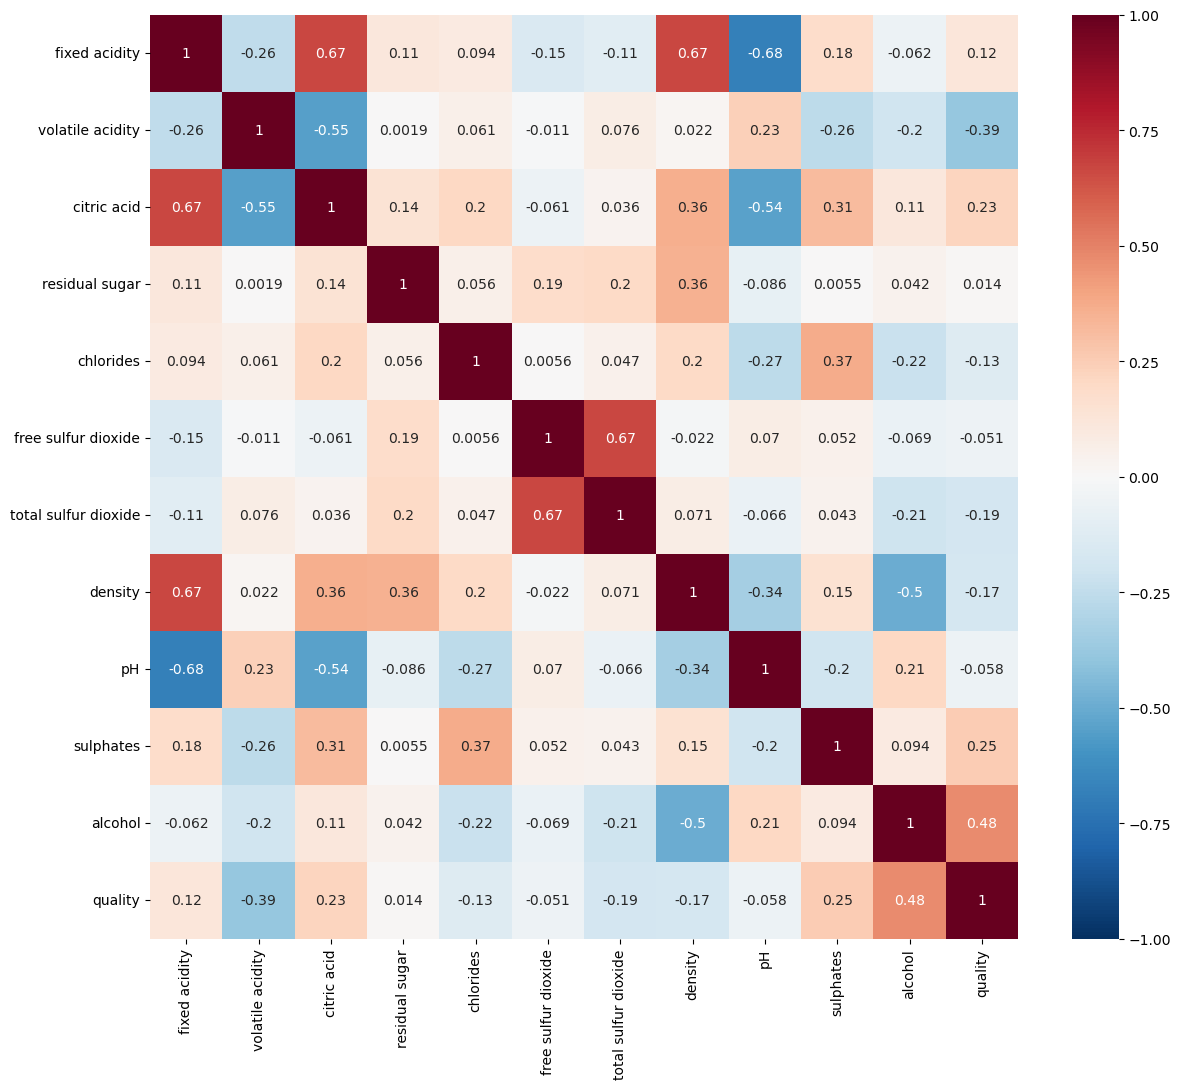

In [3]:
correlation=data.corr()
plt.figure(figsize=(14,12))
heatmap=sns.heatmap(correlation,annot=True,linewidths=0,vmin=-1,cmap="RdBu_r")
plt.show()

<Figure size 640x480 with 0 Axes>

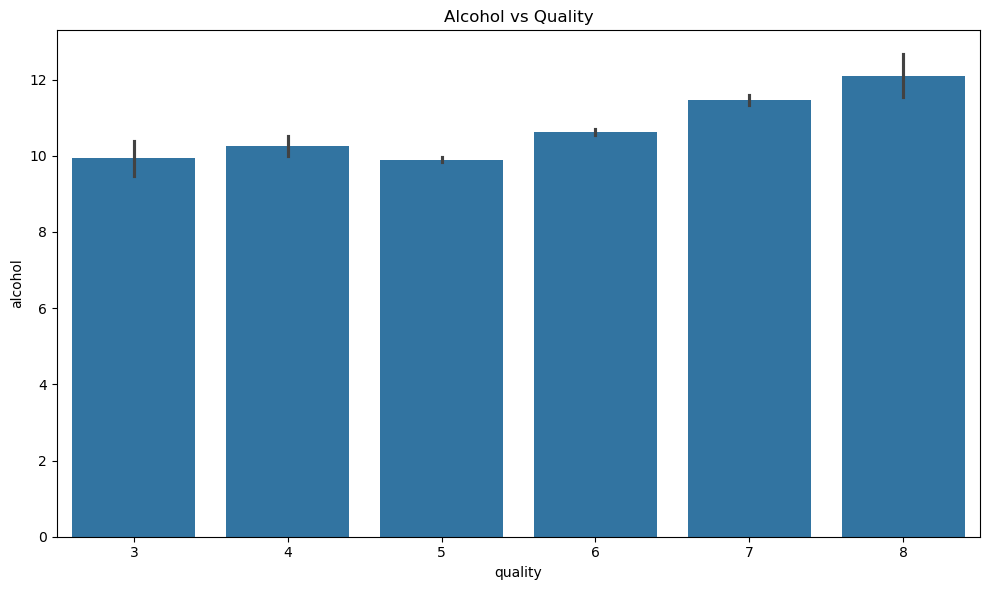

In [4]:
#Visualization of correlation between Alcohol and quality
quality_alcohol=data[['quality','alcohol']]
fig,axs=plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=quality_alcohol,ax=axs)
plt.title("Alcohol vs Quality")
plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:
#Outlier Detection
for feature in data.keys():
    Q1 = np.percentile(data[feature], q=25)
    Q3 = np.percentile(data[feature], q=75)
    IQR = Q3 - Q1
    step = 1.5 * IQR

    print(f"Data points considered outliers for the feature '{feature}':")

    outliers_mask = ~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))

    display(data[outliers_mask])

    outliers = data[outliers_mask].index.tolist()

    good_data = data.drop(outliers).reset_index(drop=True)

    


Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
127,11.6,0.440,0.64,2.1,0.059,5.0,15.0,0.99800,3.21,0.67,10.200000,6
164,11.8,0.260,0.52,1.8,0.071,6.0,10.0,0.99680,3.20,0.72,10.200000,7
199,11.5,0.410,0.52,3.0,0.080,29.0,55.0,1.00010,3.26,0.88,11.000000,5
216,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.000000,6
217,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.000000,6
220,11.4,0.600,0.49,2.7,0.085,10.0,41.0,0.99940,3.15,0.63,10.500000,6
254,11.4,0.360,0.69,2.1,0.090,6.0,21.0,1.00000,3.17,0.62,9.200000,6
304,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.200000,5
363,11.8,0.380,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.800000,6
390,11.6,0.410,0.58,2.8,0.096,25.0,101.0,1.00024,3.13,0.53,10.000000,5


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,7.6,0.510,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2,6
113,8.9,0.310,0.57,2.0,0.111,26.0,85.0,0.99710,3.26,0.53,9.7,5
227,10.6,0.480,0.64,2.2,0.111,6.0,20.0,0.99700,3.26,0.66,11.7,6
234,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,6
326,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3,5
537,9.0,0.360,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6
671,6.1,0.580,0.23,2.5,0.044,16.0,70.0,0.99352,3.46,0.65,12.5,6
673,10.2,0.410,0.43,2.2,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,5
716,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9,6


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
238,8.0,0.67,0.30,2.0,0.060,38.0,62.0,0.99580,3.26,0.56,10.2,6
255,8.7,0.82,0.02,1.2,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5
475,6.9,0.56,0.03,1.5,0.086,36.0,46.0,0.99522,3.53,0.57,10.6,5
510,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6
513,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6
727,7.5,0.61,0.20,1.7,0.076,36.0,60.0,0.99494,3.10,0.40,9.3,5
873,6.6,0.58,0.02,2.0,0.062,37.0,53.0,0.99374,3.35,0.76,11.6,7


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,7.8,0.50,0.17,1.6,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
97,6.8,0.64,0.10,2.1,0.085,18.0,101.0,0.99560,3.34,0.52,10.2,5
306,7.3,0.73,0.24,1.9,0.108,18.0,102.0,0.99670,3.26,0.59,9.3,5
390,11.6,0.41,0.58,2.8,0.096,25.0,101.0,1.00024,3.13,0.53,10.0,5
391,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5,5
827,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5
970,7.2,0.66,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
